In [ ]:
## run this command in terminal to get dataset
# wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
# unzip jena_climate_2009_2016.csv.zip

zsh:1: command not found: wget
unzip:  cannot find or open jena_climate_2009_2016.csv.zip, jena_climate_2009_2016.csv.zip.zip or jena_climate_2009_2016.csv.zip.ZIP.


In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("/Users/baijuyadav/Desktop/deeplearningfromscratch/jena_climate_2009_2016.csv")

In [43]:
df .head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [44]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [45]:
df.shape

(420451, 15)

In [46]:
df['Date Time'][:5]

0    01.01.2009 00:10:00
1    01.01.2009 00:20:00
2    01.01.2009 00:30:00
3    01.01.2009 00:40:00
4    01.01.2009 00:50:00
Name: Date Time, dtype: object

In [47]:
df.drop(columns=['Date Time'],inplace=True)

In [48]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [49]:
df.shape

(420451, 14)

In [50]:
# our target variable is temperature 

target = 'T (degC)'
y = df[target]
X = df.drop(columns=[target])


In [51]:
print(X.shape)
print(y.shape)

(420451, 13)
(420451,)


In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.05)


In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(319542, 13)
(319542,)
(16818, 13)
(16818,)
(84091, 13)
(84091,)


In [53]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

In [54]:
X_train

array([[ 1.15528988,  1.41953952,  0.7822774 , ...,  0.82246989,
         0.8147534 ,  0.75902307],
       [ 1.14092533, -0.5505587 , -0.44746559, ...,  0.5826182 ,
         0.8532037 ,  0.69789616],
       [ 0.25989908,  1.02716456,  0.44513771, ..., -0.26658644,
         0.25081566, -0.02755335],
       ...,
       [ 0.51726409, -1.45748525, -1.38610999, ...,  0.41407377,
         0.39180009, -1.38791536],
       [-0.52296934,  0.12728666, -0.36577976, ...,  1.43182285,
         1.82727799,  0.89627027],
       [-0.36376215, -0.48359651, -0.15191142, ..., -0.7851847 ,
        -0.70616961,  1.28840515]], shape=(319542, 13))

In [55]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense  

In [58]:
model = Sequential([
  Dense(16,activation='relu',input_shape=(X_train.shape[1],)),
  Dense(1,activation='sigmoid')
]
)


/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
callbacks = [tf.keras.callbacks.ModelCheckpoint("jena_dense.keras",save_best_only=True)]

In [61]:
model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])

In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_valid,y_valid),callbacks=callbacks,verbose=2,shuffle=True)

Epoch 1/10
9986/9986 - 4s - 403us/step - loss: 141.6818 - mae: 9.6636 - val_loss: 138.9030 - val_mae: 9.5429
Epoch 2/10
9986/9986 - 4s - 353us/step - loss: 141.5453 - mae: 9.6461 - val_loss: 138.9029 - val_mae: 9.5430
Epoch 3/10
9986/9986 - 4s - 363us/step - loss: 141.5452 - mae: 9.6462 - val_loss: 138.9029 - val_mae: 9.5430
Epoch 4/10
9986/9986 - 4s - 366us/step - loss: 141.5453 - mae: 9.6462 - val_loss: 138.9029 - val_mae: 9.5428
Epoch 5/10
9986/9986 - 4s - 360us/step - loss: 141.5449 - mae: 9.6462 - val_loss: 138.9029 - val_mae: 9.5430
Epoch 6/10
9986/9986 - 4s - 357us/step - loss: 141.5449 - mae: 9.6462 - val_loss: 138.9030 - val_mae: 9.5432
Epoch 7/10
9986/9986 - 4s - 366us/step - loss: 141.5452 - mae: 9.6462 - val_loss: 138.9029 - val_mae: 9.5431
Epoch 8/10
9986/9986 - 4s - 354us/step - loss: 141.5452 - mae: 9.6462 - val_loss: 138.9029 - val_mae: 9.5428
Epoch 9/10
9986/9986 - 4s - 354us/step - loss: 141.5449 - mae: 9.6462 - val_loss: 138.9029 - val_mae: 9.5430
Epoch 10/10
9986/99

In [66]:
model = tf.keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(X_test,y_test,verbose=0)[1]}")

Test MAE: 9.607906341552734


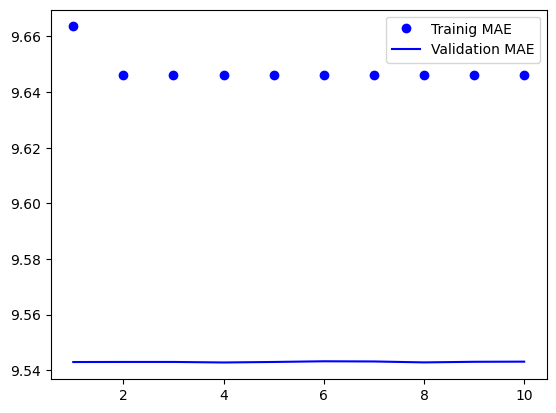

In [68]:
import matplotlib.pyplot as plt 
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1,len(loss)+1)
plt.figure()
plt.plot(epochs,loss,"bo",label="Trainig MAE")
plt.plot(epochs,val_loss,"b",label="Validation MAE")
plt.legend()
plt.show()

** LSTM NOW

In [118]:
df_ = pd.read_csv('/Users/baijuyadav/Desktop/deeplearningfromscratch/jena_climate_2009_2016.csv')

In [119]:
df_.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [123]:
df_.shape

(420451, 15)

In [124]:
target = 'T (degC)'
y = df[target]
X = df.drop(columns=[target])



In [125]:
X.shape

(420451, 13)

In [126]:
y.shape

(420451,)

In [127]:

import numpy as np
# first make sequence for data as lstm takes sample feature ant timestamp

def create_sequence(X,y,windowSize):
  X_seq,y_seq = [],[]
  for i in range(X.shape[0]-windowSize):
    X_seq.append(X[i:i+windowSize])
    y_seq.append(y[i:i+windowSize])

  return np.array(X_seq),np.array(y_seq)

In [128]:
print(X.shape)
print(y.shape)

(420451, 13)
(420451,)


In [129]:
windowSize=24 # 24 hour 
X_seq,y_seq = create_sequence(X,y,windowSize)

In [130]:
print(X_seq.shape)
print(y_seq.shape)

(420427, 24, 13)
(420427, 24)


In [131]:
X_seq

array([[[ 9.96520e+02,  2.65400e+02, -8.90000e+00, ...,  1.03000e+00,
          1.75000e+00,  1.52300e+02],
        [ 9.96570e+02,  2.65010e+02, -9.28000e+00, ...,  7.20000e-01,
          1.50000e+00,  1.36100e+02],
        [ 9.96530e+02,  2.64910e+02, -9.31000e+00, ...,  1.90000e-01,
          6.30000e-01,  1.71600e+02],
        ...,
        [ 9.97100e+02,  2.64520e+02, -9.76000e+00, ...,  2.90000e-01,
          7.50000e-01,  1.49700e+02],
        [ 9.97060e+02,  2.64390e+02, -9.99000e+00, ...,  1.20000e-01,
          6.30000e-01,  2.31700e+02],
        [ 9.96990e+02,  2.64340e+02, -1.00200e+01, ...,  1.00000e-01,
          3.80000e-01,  2.40000e+02]],

       [[ 9.96570e+02,  2.65010e+02, -9.28000e+00, ...,  7.20000e-01,
          1.50000e+00,  1.36100e+02],
        [ 9.96530e+02,  2.64910e+02, -9.31000e+00, ...,  1.90000e-01,
          6.30000e-01,  1.71600e+02],
        [ 9.96510e+02,  2.65120e+02, -9.07000e+00, ...,  3.40000e-01,
          5.00000e-01,  1.98000e+02],
        ...,


In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_seq,y_seq,test_size=0.2,random_state=1,shuffle=False)
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.05,random_state=1,shuffle=False)

In [133]:
import tensorflow as tf 
from tensorflow.keras.models  import Sequential 
from tensorflow.keras.layers import Dense , LSTM

In [135]:
model = Sequential([
  LSTM(64,return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])),
  Dense(1)]
)

/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [136]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,033 (78.25 KB)

 Trainable params: 20,033 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [139]:
history = model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 1.5176 - mae: 0.8452
Epoch 2/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 1.4733 - mae: 0.8353
Epoch 3/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 1.4456 - mae: 0.8306
Epoch 4/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 1.4218 - mae: 0.8249
Epoch 5/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 1.4029 - mae: 0.8212
Epoch 6/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 1.3840 - mae: 0.8156
Epoch 7/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 1.3741 - mae: 0.8140
Epoch 8/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 1.3578 - mae: 0.8088
Epoch 9/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 1.3530 - mae: 0.8088
Epoch 10/10
9986/9986 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 1.3433 - mae: 0.8058


In [141]:
model.evaluate(X_test,y_test)[1]

2628/2628 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.4508 - mae: 0.8238


0.8238064050674438

In [146]:
# numpy implementation of simple RNN 
import numpy as np 
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps,input_features))



state_t = np.zeros((output_features,))
W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))
b = np.random.random((output_features))
successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W,input_t) + np.dot(U,state_t) + b)
  
  successive_outputs.append(output_t)
  state_t = output_t 
final_output_sequence = np.stack(successive_outputs,axis=0)

In [147]:
print(final_output_sequence)

[[0.99999997 1.         1.         ... 0.99999987 0.99999999 1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


In [148]:
len(final_output_sequence)

100